In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [3]:
from sklearn.datasets import make_blobs

In [27]:
X , y = make_blobs(centers=3,random_state=42)

In [5]:
import seaborn as sns

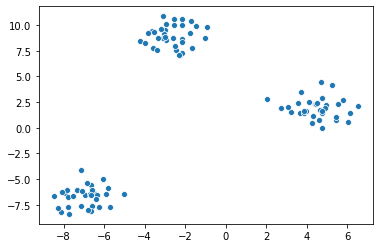

In [6]:
sns.scatterplot(X[:,0],X[:,1])

In [7]:
from sklearn.cluster import KMeans

In [8]:
model=KMeans(n_clusters=2)

In [9]:
model.fit(X)

KMeans(n_clusters=2)

In [10]:
y_gen = model.labels_

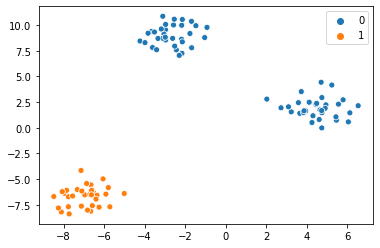

In [11]:
sns.scatterplot(X[:,0],X[:,1],hue = y_gen)

In [12]:
model.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

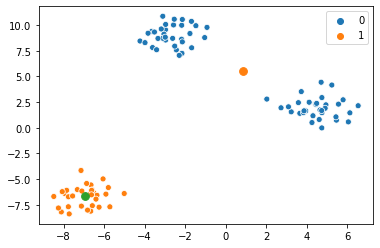

In [13]:
sns.scatterplot(X[:,0],X[:,1],hue = y_gen)

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)

In [22]:
class Cluster:
    
    def __init__(self,center):
        self.center=center
        self.points=[]


class CustomKMeans:
    
    def __init__(self,n_clusters=3):
        seld.n_clusters = n_clusters
        
    def fit(self ,X ):
        
        clusters=[]
        for i in range (self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
            
        self.cluster_centers_=[cluster.center for cluster in clusters ]

In [23]:
model=KMeans(n_clusters=4)
model.fit(X)


KMeans(n_clusters=4)

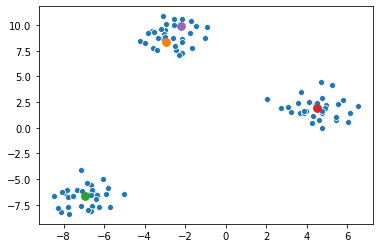

In [24]:
sns.scatterplot(X[:,0],X[:,1])

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)

In [25]:
class Cluster:
    
    def __init__(self,center):
        self.center=center
        self.points=[]

    def distance(self,point):
        return np.sqrt(np.sum(point -self.center)**2)  
            

class CustomKMeans:
    
    def __init__(self,n_clusters=3):
        seld.n_clusters = n_clusters
        
    def fit(self ,X ):
        
        clusters=[]
        for i in range (self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
            
        labels=[]
        
        
        #GOING FOR EACH POINT 
        
        for point in X:
            
           # COLLECTING DISTANCES FROM EVERY CLUSTER 
            dist=[]
            for cluster in clusters :
                dist.append(cluster.distance(point))

        # FINDINNG CLOSEST CLUSTER        
            closest_idx=np.argmin(dist)
            closest_cluster = clusters[closest_idx]
            closest_cluster.points.append(point)
            labels.append(closest_idx)
        
        self.labels=labels   
        self.cluster_centers_=[cluster.center for cluster in clusters ]

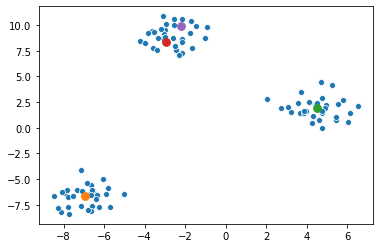

In [26]:
model=KMeans(n_clusters=4)
model.fit(X)


sns.scatterplot(X[:,0],X[:,1])

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)

In [28]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        
        
        for i in range(self.max_iters):
            
            labels = []
        
            # going for each point
            for point in X:

                # collecting disctances form every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        
            
        
        

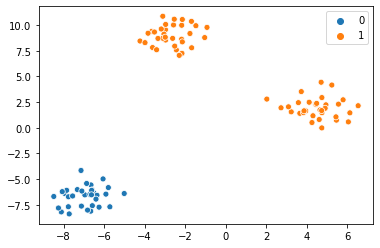

In [29]:
model = CustomKMeans(n_clusters=2)

model.fit(X)

sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)

